In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch import nn
from torch.nn import functional as F
from typing import Optional, Callable
import wandb
from sklearn.metrics import accuracy_score

from train.train import train, evaluate
from models.LeNet import LeNet
from data.get_data import get_dataloader

In [ ]:
run = wandb.init(project="test")

In [8]:
tr, val, te = get_dataloader(dataset='MNIST', batch_size=4, num_workers=4, img_height=200, img_width=200)
len(tr), len(val), len(te)

c:\ProgramData\anaconda3\Lib\site-packages\torch\utils\data\dataset.py:449: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(f"Length of split at index {i} is 0. "


(12000, 3000, 0)

torch.Size([4, 1, 200, 200]) torch.Size([4])


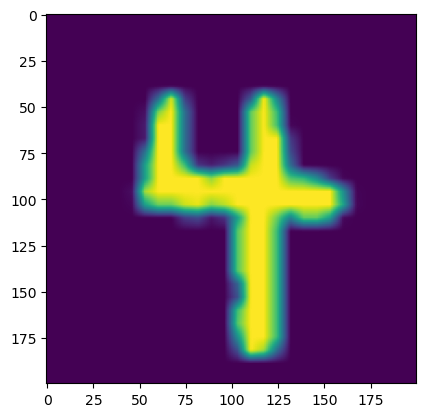

In [9]:
for i in tr:
    img, label = i
    break

print(img.shape, label.shape)

plt.imshow(img[0].permute(1, 2, 0))

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet(num_channels=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [8]:
train(  model,
        criterion,
        optimizer, 
        te,
        val_loader=val,
        device=device,
        max_epochs=1,
        eval_every=50,
        eval_metric=accuracy_score,
        # wandb_run=run
    )

Train Epoch 0/1  Batch 0/79:	
Loss: 2.415232	Score: 0.0859375
Validation:	


  0%|          | 0/79 [00:00<?, ?it/s]

In [9]:
run.finish()

train_loss,█▄▄▃▃▂▃▂▂▂▁▁▂▂▁▁▂▂▁▂▂▁▂▂▂▁▁▂▁▂▁▂▁▂▂▁▁▁▂▁
train_loss,2.50846
train_score,nan


In [45]:
for X_batch, y_batch in te:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    output = model(X_batch)
    # y_batch = y_batch.unsqueeze(1).to(torch.float32)

    print(y_batch.shape, output.shape)
    criterion(output, y_batch)
    print(accuracy_score(y_batch.cpu().numpy(), output.argmax(1).cpu().numpy()))
    break

torch.Size([128]) torch.Size([128, 10])
0.9765625


In [2]:
import os

from torch.utils.data import DataLoader
import torchvision.datasets
from torchvision import transforms as tfs
from torch.utils.data import random_split
from functools import partial

data_tfs = tfs.Compose([
        tfs.ToTensor(),
        tfs.Normalize((0.5), (0.5)),
])

train_dataset = torchvision.datasets.Caltech101('data/datasets',  transform=data_tfs, download=True)

Downloading...
From (original): https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
From (redirected): https://drive.usercontent.google.com/download?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&confirm=t&uuid=a18b318a-9b8a-4d61-8997-e64aa70b42d7
To: c:\Users\Борис\Desktop\models\git\data\datasets\caltech101\101_ObjectCategories.tar.gz
100%|██████████| 132M/132M [00:13<00:00, 9.46MB/s] 


Extracting data/datasets\caltech101\101_ObjectCategories.tar.gz to data/datasets\caltech101


Downloading...
From (original): https://drive.google.com/uc?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m
From (redirected): https://drive.usercontent.google.com/download?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m&confirm=t&uuid=cf6f4819-696a-4741-ad55-20348cb16d59
To: c:\Users\Борис\Desktop\models\git\data\datasets\caltech101\Annotations.tar
100%|██████████| 14.0M/14.0M [00:01<00:00, 8.26MB/s]


Extracting data/datasets\caltech101\Annotations.tar to data/datasets\caltech101


In [8]:
len(train_dataset)

8677